<a href="https://colab.research.google.com/github/vy-phung/Cancer-diagnosis/blob/master/Breast_Cancer_Wisconsin_(Diagnostic)_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Breast Cancer Wisconsin (Diagnostic) Data Set</h1>**
<h4>Data source: on <a href = 'https://www.kaggle.com/uciml/breast-cancer-wisconsin-data'>Kagge</a> <br> <h4>

**<h3>Author</h3>** 
<p>Vy K Phung</p>

**<h3>Date</h3>** 
<p>2022-Jan-06</p>

####**Attribute Information:** <br>
*(I get the attribute information from the above data source. If you want to know the details clearly, you can go to the link Kaggle above)*

1) ID number <br>
2) Diagnosis (M = malignant, B = benign)


Ten real-valued attributes for each cell nucleus:

| Field name  | Description                 |
| ----------- | --------------------------- |
| Radius      | mean of distances from center to points on the perimeter             |
| Texture       | standard deviation of gray-scale values             |
| Perimeter    | perimeter     |
| Area   | area    |
| Smoothness     | local variation in radius lengths           |
| Compactness   | perimeter^2 / area - 1.0                    |
| Concavity     | severity of concave portions of the contour                 |
| Concave points  | number of concave portions of the contour             |
| Symmetry         | Symmetry                     |
| Fractal dimension       | "coastline approximation" - 1         |

For 10 above attributes, there are 3 types: their mean, their se(standard error), and their worst, which as a result in the dataset you will see for example: radius_mean; radius_se; radius_worst <br> 


####**Steps:** <br>
1. I will use multi linear regression in order to predict radius size. 
2. In order to classify benign or malignant, I will train 2 models: K-nearest neighbor (KNN) and Support Vector Machines (SVM) by using mean data.
3. After training model, I use worst data for testing model accuracy. 


**<h2>Table of contents</h2>**
1. Load packages
2. Data preprocessing
<ul>
<li>Data visualization</li>
</ul>
3. Linear regression
<ul>
<li>Test-train split</li>
<li>Multi linear regression</li>
</ul>
4. Classification
<ul>
<li>Normalize data</li>
<li>Test-train split</li>
<li>KNN with GridSearchCV</li>
<li>SVM with GridSearchCV</li>
</ul>
5. Model Evaluation
<ul>
<li>Prepare data</li>
<li>Test-train split</li>
<li>Multi linear regression accuracy</li>
<li>KNN with GridSearchCV accuracy</li>
<li>SVM with GridSearchCV accuracy</li>
</ul>



**<h2>Load packages</h2>**

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, jaccard_score, f1_score, mean_squared_error
%matplotlib inline

**<h2>Data preprocessing</h2>**

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**<h3>Data visualization</h3>**

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=360)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

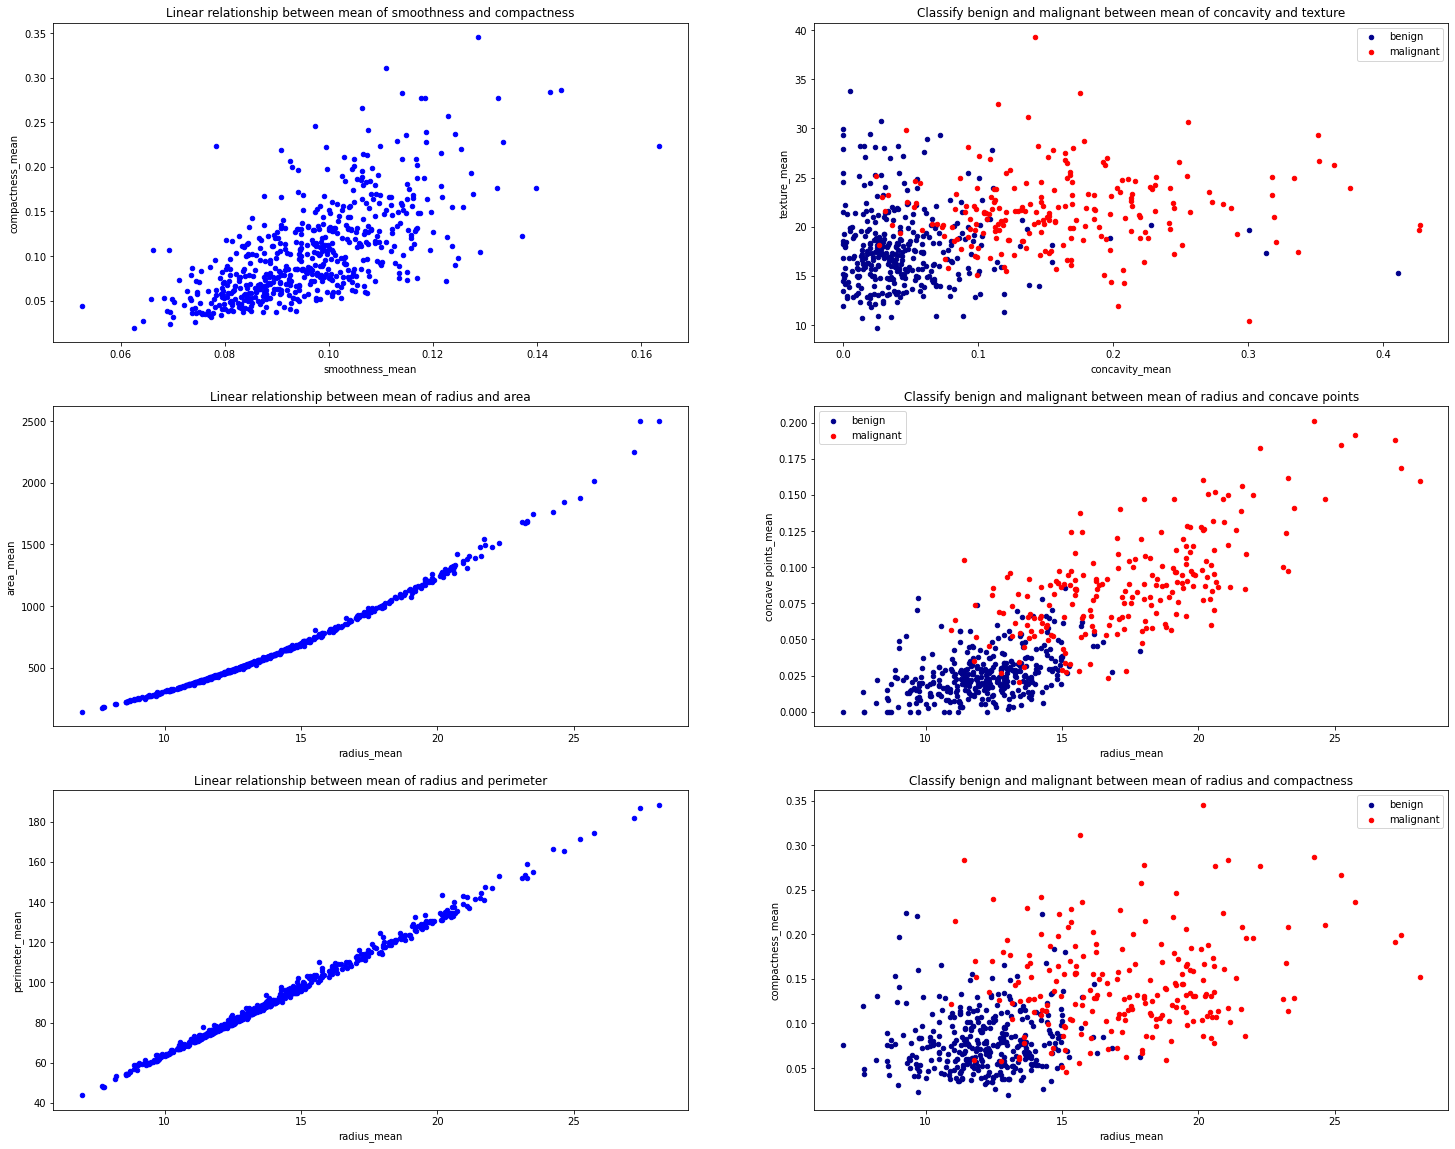

In [ ]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(3, 2, 1) 
ax1 = fig.add_subplot(3, 2, 2) 
ax2 = fig.add_subplot(3, 2, 3) 
ax3 = fig.add_subplot(3, 2, 4)
ax4 = fig.add_subplot(3, 2, 5)
ax5 = fig.add_subplot(3, 2, 6)
# subplot 1: smooth ~ compact linear
df[['smoothness_mean','compactness_mean']].plot(kind = 'scatter', x='smoothness_mean', y='compactness_mean', color='blue', figsize=(25, 20), ax = ax0)
ax0.set_ylabel("compactness_mean")
ax0.set_xlabel("smoothness_mean")
ax0.set_title('Linear relationship between mean of smoothness and compactness')
#subplot 2: concavity ~ texture classify 
df[df['diagnosis'] == 'B'].plot(kind='scatter', x='concavity_mean', y='texture_mean', color='DarkBlue', label='benign', figsize=(25, 20), ax =ax1);
df[df['diagnosis'] == 'M'].plot(kind='scatter', x='concavity_mean', y='texture_mean', color='Red', label='malignant', figsize=(25, 20),ax=ax1);
ax1.set_title('Classify benign and malignant between mean of concavity and texture')
#subplot 3: radius ~ area linear
df[['radius_mean','area_mean']].plot(kind = 'scatter', x='radius_mean', y='area_mean', color='blue', figsize=(25, 20),ax = ax2)
ax2.set_title('Linear relationship between mean of radius and area')
#subplot 4: radius ~ concave classify
df[df['diagnosis'] == 'B'].plot(kind='scatter', x='radius_mean', y='concave points_mean', color='DarkBlue', label='benign', figsize=(25, 20),ax=ax3);
df[df['diagnosis'] == 'M'].plot(kind='scatter', x='radius_mean', y='concave points_mean', color='Red', label='malignant', figsize=(25, 20),ax=ax3);
ax3.set_title('Classify benign and malignant between mean of radius and concave points')
#subplot 5: radius ~ perimeter linear
df[['radius_mean','perimeter_mean']].plot(kind = 'scatter', x='radius_mean', y='perimeter_mean', color='blue', figsize=(25, 20),ax = ax4)
ax4.set_title('Linear relationship between mean of radius and perimeter')
#subplot 6: radius ~ compact classify
df[df['diagnosis'] == 'B'].plot(kind='scatter', x='radius_mean', y='compactness_mean', color='DarkBlue', label='benign', figsize=(25, 20),ax = ax5);
df[df['diagnosis'] == 'M'].plot(kind='scatter', x='radius_mean', y='compactness_mean', color='Red', label='malignant', figsize=(25, 20),ax=ax5);
ax5.set_title('Classify benign and malignant between mean of radius and compactness')
plt.show()

**<h2>Linear regression</h2>**
<p>According to the figure number 3, 4, 5, we can see there is quite a linear relationship between radius_mean to other variables (area_mean, concave points_mean, perimeter_mean). <br>
Therefore, instead of using radius_mean as independent variable (X), I will use it as Y which is depend on 3 variables (area_mean, concave points_mean, perimeter_mean) in order to predict the radius_mean </p>

In [ ]:
X_ra = df[['perimeter_mean',	'area_mean','concave points_mean']]
X_ra.head() 

,perimeter_mean,area_mean,concave points_mean
0,122.80,1001.0,0.14710
1,132.90,1326.0,0.07017
2,130.00,1203.0,0.12790
3,77.58,386.1,0.10520
4,135.10,1297.0,0.10430


In [ ]:
Y_ra = df[['radius_mean']]
Y_ra.head()

,radius_mean
0,17.99
1,20.57
2,19.69
3,11.42
4,20.29


**<h4>Test-train split</h4>**

In [ ]:
Xra_train, Xra_test, Yra_train, Yra_test = train_test_split(X_ra, Y_ra, test_size=0.2, random_state=4)
print ('Train set:', Xra_train.shape,  Yra_train.shape)
print ('Test set:', Xra_test.shape,  Yra_test.shape)

Train set: (455, 3) (455, 1)
Test set: (114, 3) (114, 1)


**<h4>Multi linear regression</h4>**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xra_train,Yra_train)
yhat = lr.predict(Xra_test)
print('Predicted value:', yhat[0:5])
print('actual value:', Yra_test.values[0:5])
print('The R-square of testing data: ', lr.score(Xra_test, Yra_test))
print('The R-square of training data: ', lr.score(Xra_train, Yra_train))
print('The mean square error of all actual and predicted fitting data is: ', mean_squared_error(Y_ra, lr.predict(X_ra))) 

Predicted value: [[14.50532844]
 [12.21911409]
 [19.52004677]
 [17.39865396]
 [16.40633319]]
actual value: [[14.42]
 [12.05]
 [19.53]
 [17.29]
 [16.5 ]]
The R-square of testing data:  0.998916869295868
The R-square of training data:  0.9982116903428075
The mean square error of all actual and predicted fitting data is:  0.02035123380666617


<p>According to the R-square of both test and train data which are all near 1.0 and positive linear relationship, we can see that the multilinear regression model fits the data. I will evaluate model again in model evaluation section with worst data</p>

**<h2>Classfication</h2>**
<p>For classification, I will use 2 models: K-nearest neighbor (KNN) and Support Vector Machines (SVM) </p>

**<h3>Normalize data for classification</h3>**
<p>In this case for training model, I will use 8 attributes, including: radius, perimeter, compactness, concave points, smoothness, area, concavity, texture, whom of them are mean. But using the characteristic worst of all 8 above attributes to be a test for testing the model accuracy</p> 

In [ ]:
x = df[['radius_mean',	'texture_mean',	'perimeter_mean',	'area_mean',	'smoothness_mean',	'compactness_mean',	'concavity_mean',	'concave points_mean']].values
x[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01],
       [1.142e+01, 2.038e+01, 7.758e+01, 3.861e+02, 1.425e-01, 2.839e-01,
        2.414e-01, 1.052e-01],
       [2.029e+01, 1.434e+01, 1.351e+02, 1.297e+03, 1.003e-01, 1.328e-01,
        1.980e-01, 1.043e-01]])

In [ ]:
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
         3.28351467,  2.65287398,  2.53247522],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825, -0.82696245,
        -0.48707167, -0.02384586,  0.54814416],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044,
         1.05292554,  1.36347845,  2.03723076],
       [-0.76890929,  0.25373211, -0.59268717, -0.76446379,  3.28355348,
         3.40290899,  1.91589718,  1.45170736],
       [ 1.75029663, -1.15181643,  1.77657315,  1.82622928,  0.28037183,
         0.53934045,  1.37101143,  1.42849277]])

In [ ]:
y = df['diagnosis'].values
y[0:5]

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

**<h3>Test-train split</h3>**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (455, 8) (455,)
Test set: (114, 8) (114,)


**<h3>KNN using GridSearchCV with cv = 10 to find best parameter for model</h3>**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN,parameters_knn,cv=10)
knn_cv.fit(x_train,y_train)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
print('accuracy on test data:',knn_cv.score(x_test,y_test))

tuned hpyerparameters :(best parameters)  {'n_neighbors': 8}
accuracy : 0.9360869565217392
accuracy on test data: 0.9385964912280702


<p>As we can see, the best k for model is 8 with the highest accurary on test data: 0.9385964912280702 </p>

**<h3>SVM using GridSearchCV with cv = 10 to find best parameter for model </h3>**

In [ ]:
from sklearn.svm import SVC 
parameters_svm = {'kernel':('linear','rbf','poly','rbf','sigmoid'),
                  'C': np.logspace(-3, 3, 5),
                  'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm,parameters_svm,cv=10)
svm_cv.fit(x_train, y_train) 
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)
print('accuracy on test data:',svm_cv.score(x_test,y_test))

tuned hpyerparameters :(best parameters)  {'C': 31.622776601683793, 'gamma': 0.03162277660168379, 'kernel': 'rbf'}
accuracy : 0.9515942028985508
accuracy on test data: 0.956140350877193


**<h2>Model Evaluation</h2>**

**<h3>Prepare data</h3>**

In [ ]:
test_df = df[['radius_worst',	'texture_worst',	'perimeter_worst',	'area_worst',	'smoothness_worst',	'compactness_worst',	'concavity_worst',	'concave points_worst']]
test_df.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst
0,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654
1,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860
2,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430
3,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575
4,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625


In [ ]:
# normalize data
X = test_df.values
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
         2.61666502,  2.10952635,  2.29607613],
       [ 1.80592744, -0.36920322,  1.53512599,  1.89048899, -0.37561196,
        -0.43044422, -0.14674897,  1.0870843 ],
       [ 1.51187025, -0.02397438,  1.34747521,  1.45628455,  0.52740741,
         1.08293217,  0.85497394,  1.95500035],
       [-0.28146446,  0.13398409, -0.2499393 , -0.55002123,  3.3942747 ,
         3.89339743,  1.98958826,  2.17578601],
       [ 1.29857524, -1.46677038,  1.33853946,  1.22072425,  0.22055617,
        -0.31339451,  0.61317876,  0.72925926]])

In [ ]:
Y = df['diagnosis'].values
Y[0:5] 

array(['M', 'M', 'M', 'M', 'M'], dtype=object)

In [ ]:
X1 = df[['perimeter_worst',	'area_worst','concave points_worst']]
Y1 = df[['radius_worst']]

**<h3>Multi linear regression accuracy</h3>**

In [ ]:
ypred = lr.predict(X1)
print('predicted values:', ypred[0:5])
print('actual values:', Y1.values[0:5])
print('The R-square of data: ', lr.score(X1, Y1))
print('The mean square error: ', mean_squared_error(Y1, ypred))

predicted values: [[26.79101315]
 [23.5784894 ]
 [22.04086914]
 [13.36723553]
 [22.60681934]]
actual values: [[25.38]
 [24.99]
 [23.57]
 [14.91]
 [22.54]]
The R-square of data:  0.9852801251993204
The mean square error:  0.34325525254669925


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area_worst
- concave points_worst
- perimeter_worst
Feature names seen at fit time, yet now missing:
- area_mean
- concave points_mean
- perimeter_mean

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area_worst
- concave points_worst
- perimeter_worst
Feature names seen at fit time, yet now missing:
- area_mean
- concave points_mean
- perimeter_mean

  warnings.warn(message, FutureWarning)


**<h3>KNN with GridSearchCV accuracy</h3>**

In [ ]:
KNN_CV = knn_cv.predict(X)
print('predicted values:',KNN_CV[0:10])
print('actual values:',Y[0:10])
print("accuracy score:",knn_cv.score(X,Y))

predicted values: ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
actual values: ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
accuracy score: 0.9595782073813708


              precision    recall  f1-score   support

           B       0.97      0.96      0.97       357
           M       0.94      0.95      0.95       212

    accuracy                           0.96       569
   macro avg       0.96      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569

jaccard score of benign: 0.9373297002724795
jaccard score of malignant: 0.8977777777777778
weighted f1 score: 0.9596349262674452


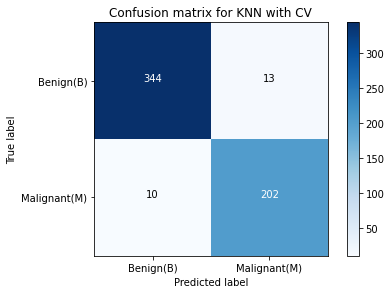

In [ ]:
print(classification_report(Y, KNN_CV))
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(Y, KNN_CV), classes=['Benign(B)','Malignant(M)'],  title='Confusion matrix for KNN with CV')
# jaccard
print('jaccard score of benign:', jaccard_score(Y, KNN_CV, pos_label='B'))
print('jaccard score of malignant:', jaccard_score(Y, KNN_CV, pos_label='M'))
# f1-score
print('weighted f1 score:', f1_score(Y, KNN_CV, average='weighted'))

**<h3>SVM with GridSearchCV accuracy</h3>**

In [ ]:
sv_cv = svm_cv.predict(X)
print('predicted values:', sv_cv[0:10])
print('actual values:', Y[0:10])

predicted values: ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
actual values: ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']


              precision    recall  f1-score   support

           B       0.98      0.97      0.97       357
           M       0.94      0.97      0.96       212

    accuracy                           0.97       569
   macro avg       0.96      0.97      0.96       569
weighted avg       0.97      0.97      0.97       569

jaccard score of benign: 0.9478021978021978
jaccard score of malignant: 0.9151785714285714
weighted f1 score: 0.9666849329385488


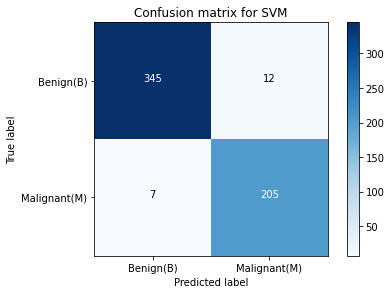

In [ ]:
print(classification_report(Y, sv_cv))
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(Y, sv_cv), classes=['Benign(B)','Malignant(M)'],  title='Confusion matrix for SVM')
# jaccard
print('jaccard score of benign:', jaccard_score(Y, sv_cv, pos_label='B'))
print('jaccard score of malignant:', jaccard_score(Y, sv_cv, pos_label='M'))
# f1-score
print('weighted f1 score:', f1_score(Y, sv_cv, average='weighted'))